# Model Analysis

Analyze vanilla model to improve model design

`fit2 = ols('n_rec_log ~ C(gender) + C(nyt_select) + ttlCommentNum', data = d).fit()`

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from scipy import stats
from statsmodels.formula.api import ols

# Model Check

In [44]:
df = pd.read_csv('finalclean.csv')

In [49]:
model = ols('n_rec_log ~ C(gender__) + C(nyt_select) + ttlCommentNum + time_order', data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              n_rec_log   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     473.8
Date:                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:43:33   Log-Likelihood:                -4123.0
No. Observations:                2945   AIC:                             8258.
Df Residuals:                    2939   BIC:                             8294.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.10

In [50]:
yhat = model.fittedvalues
residual = df['n_rec_log'] - model.fittedvalues

In [54]:
df['yhat'] = yhat
df['residual'] = residual

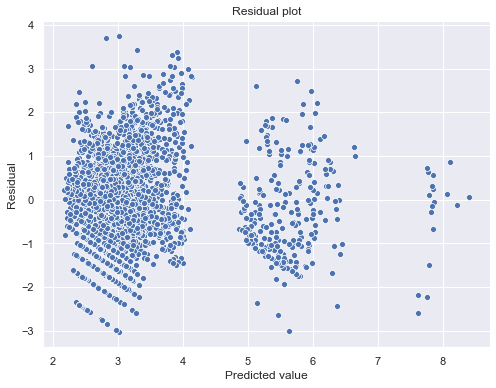

In [89]:
# Simple residual plot
fig, ax = plt.subplots(figsize=(8,6))
_ = sns.scatterplot(x='yhat', y='residual', data=df)
_ = plt.xlabel('Predicted value')
_ = plt.ylabel('Residual')
_ = plt.title('Residual plot')

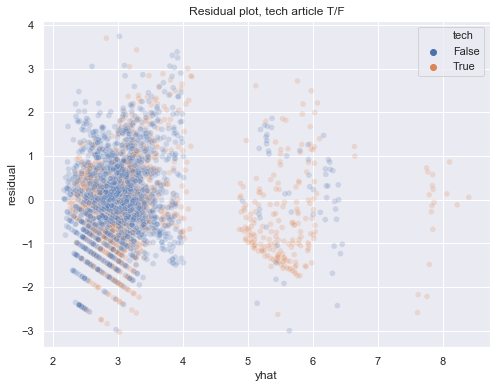

In [86]:
# Residual plot with "tech article YES/NO"

sns.set()
fig, ax = plt.subplots(figsize=(8,6))
_ = sns.scatterplot(x = 'yhat', y = 'residual', data = df, hue = 'tech', alpha = 0.2)
_ = plt.title('Residual plot, tech article T/F')

Predicted yhat empty at places, number of comments predicted behave differently.

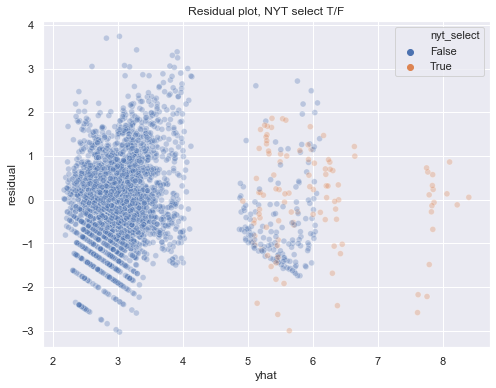

In [92]:
# Residual plot with "nyt_select YES/NO"

fig, ax = plt.subplots(figsize=(8,6))
_ = sns.scatterplot(x = 'yhat', y = 'residual', data = df, hue = 'nyt_select', alpha = 0.3)
_ = plt.title('Residual plot, NYT select T/F')

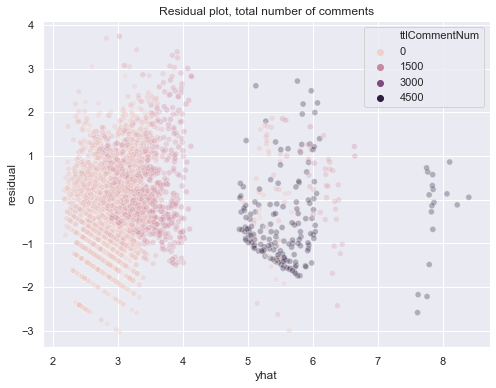

In [93]:
# Residual plot with "ttlCommentNum"

fig, ax = plt.subplots(figsize=(8,6))
_ = sns.scatterplot(x = 'yhat', y = 'residual', data = df, hue = 'ttlCommentNum', alpha = 0.3)
_ = plt.title('Residual plot, total number of comments')

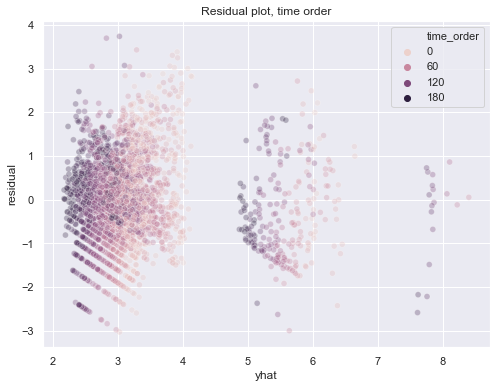

In [94]:
# Residual plot with "time_order"

fig, ax = plt.subplots(figsize=(8,6))
_ = sns.scatterplot(x = 'yhat', y = 'residual', data = df, hue = 'time_order', alpha = 0.3)
_ = plt.title('Residual plot, time order')

Seleted by nytimes, more likely to have higher predicted value. Not sure why there are those *awkward gaps* inbetween. 

`ttlCommentNum` may be most relevant to the weird gaps in values for yhat variable. Timing of a comment, shows similar pattern on all three 'chunks'.

Text(0.5, 1.0, 'Residuals, by Gender')

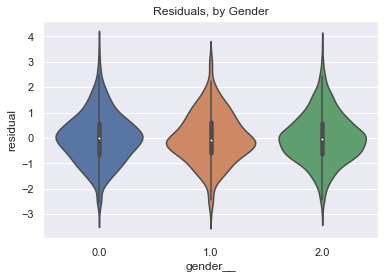

In [95]:
# Violin plot on residuals based on gender. 
# 0 = Male, 1 = Female, 2 = Unknown
sns.violinplot(x = 'gender__', y = 'residual', data = df)
plt.title('Residuals, by Gender')

Similar residual distribution (actually quite normally distributed) residuals by gender. Not so much of an issue here.

Text(0, 0.5, 'Real Value')

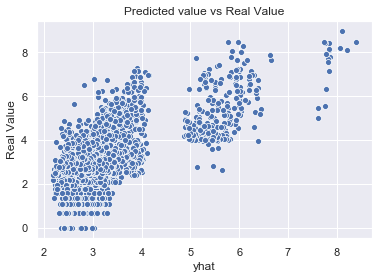

In [97]:
sns.scatterplot(x='yhat', y='n_rec_log', data=df)
plt.title('Predicted value vs Real Value')
plt.ylabel('Real Value')

In [32]:
from statsmodels.compat import lzip
import statsmodels.api as sm

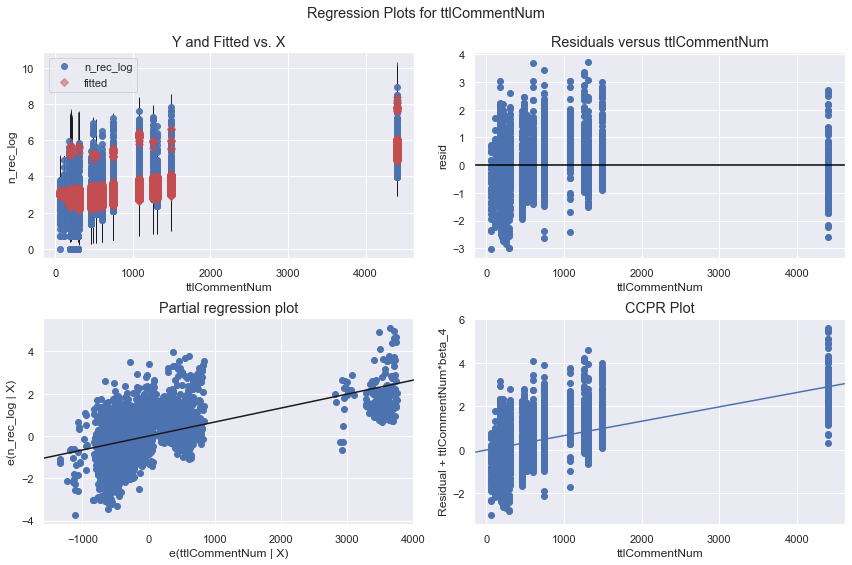

In [81]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "ttlCommentNum", fig=fig)

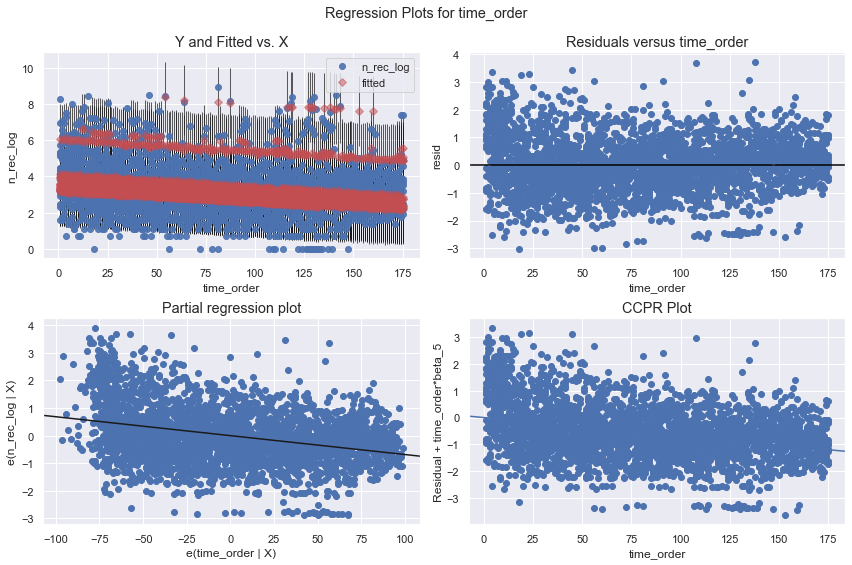

In [53]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "time_order", fig=fig)

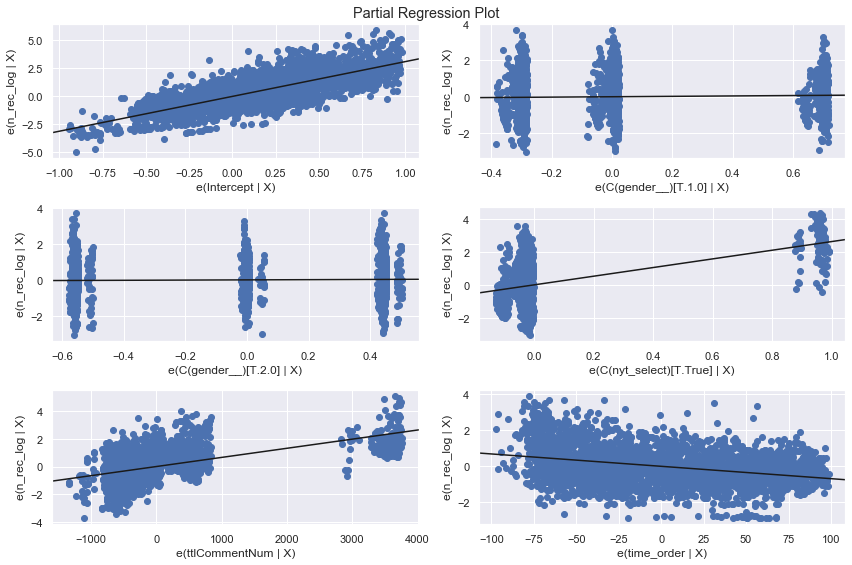

In [82]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

In [64]:
y = df['n_rec_log']

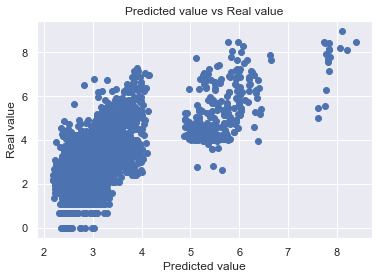

In [65]:
_ = plt.scatter(x = yhat, y = y)
_ = plt.xlabel('Predicted value')
_ = plt.ylabel('Real value')
_ = plt.title('Predicted value vs Real value')

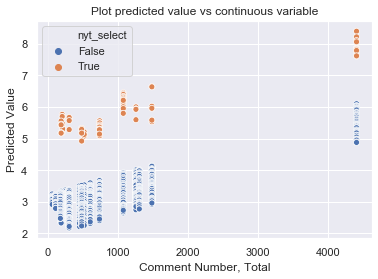

In [84]:
_ = sns.scatterplot(x = 'ttlCommentNum', y = 'yhat', hue = 'nyt_select', data = df)
_ = plt.xlabel("Comment Number, Total")
_ = plt.ylabel("Predicted Value")
_ = plt.title("Plot predicted value vs continuous variable")

Note:
Number of total comments actually behave like "categorical" because the total number of comments is same per article. This is not different per individual comments. There is this huge gap between two lines, because predicted value increases when `nyt_select` is true. `nyt_select` is a dummy variable, thus draws a parallel line. 

# Interaction term?

In [67]:
df2 = pd.read_csv('finalclean.csv')

model2 = ols('n_rec_log ~ C(gender__)*C(tech) + C(nyt_select) + ttlCommentNum + time_order', data = df2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              n_rec_log   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     305.5
Date:                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:06:13   Log-Likelihood:                -4101.7
No. Observations:                2945   AIC:                             8221.
Df Residuals:                    2936   BIC:                             8275.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [68]:
df2['yhat'] = model2.fittedvalues
df2['residuals'] = df2['n_rec_log'] - df2['yhat']

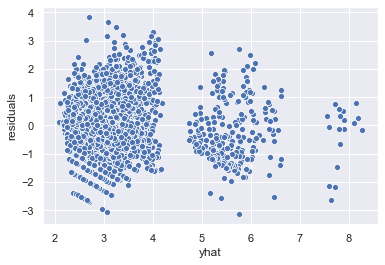

In [69]:
sns.scatterplot(x='yhat', y='residuals', data=df2)

Looks better but still got that weird gap.